<a href="https://colab.research.google.com/github/MATHKIMS/dongwoo_project/blob/main/%EA%B9%80%EB%8F%99%EC%9A%B0mask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!curl -L https://public.roboflow.com/ds/OBV3ER1zU5?key=76LbmENEVY > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   901  100   901    0     0   3769      0 --:--:-- --:--:-- --:--:--  3769
100 3791k  100 3791k    0     0  10.2M      0 --:--:-- --:--:-- --:--:-- 10.2M
Archive:  roboflow.zip
 extracting: test/images/w1240-p16x9-0e48e0098f6e832f27d8b581b33bbc72b9967a63_jpg.rf.34ed1e8f70eebdabaf43ab9d40dc1c9b.jpg  
 extracting: test/images/RTX7CCFN_jpg.rf.66ed5c5054f30d933d19ab3d56ace004.jpg  
 extracting: test/images/the-first-day-of-wuhan-s-closure-some-people-fled-some-panicked_jpg.rf.0302fefb0879eb37736a704ca5d070ff.jpg  
 extracting: test/images/1288126-10255706714jpg_jpg.rf.95f7324cbfd48e0386e0660b5e932223.jpg  
 extracting: test/images/126202-untitled-design-13_jpg.rf.56b50d413464989bb2232448a8fbb915.jpg  
 extracting: test/images/r1p00017o8171pnq407_jpg.rf.6fd25b7219a249e97f54fcabf2b52726.jpg  
 extracting: test/images/w1240-p16x9-201

In [ ]:
!git clone https://github.com/ultralytics/yolov5 
%cd yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 12621, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 12621 (delta 0), reused 1 (delta 0), pack-reused 12618
Receiving objects: 100% (12621/12621), 12.50 MiB | 20.85 MiB/s, done.
Resolving deltas: 100% (8652/8652), done.
/content/yolov5


In [ ]:
%pip install -qr requirements.txt #라이브러리 설치

     |████████████████████████████████| 596 kB 8.9 MB/s 


In [ ]:
%mkdir /content/yolov5/mask #마스크 디렉토리 만들기

In [ ]:
%cd /content/yolov5/mask
!curl -L https://public.roboflow.com/ds/OBV3ER1zU5?key=76LbmENEVY > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

/content/yolov5/mask
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   901  100   901    0     0    491      0  0:00:01  0:00:01 --:--:--   491
100 3791k  100 3791k    0     0  1939k      0  0:00:01  0:00:01 --:--:-- 1939k
Archive:  roboflow.zip
 extracting: test/images/w1240-p16x9-0e48e0098f6e832f27d8b581b33bbc72b9967a63_jpg.rf.34ed1e8f70eebdabaf43ab9d40dc1c9b.jpg  
 extracting: test/images/RTX7CCFN_jpg.rf.66ed5c5054f30d933d19ab3d56ace004.jpg  
 extracting: test/images/the-first-day-of-wuhan-s-closure-some-people-fled-some-panicked_jpg.rf.0302fefb0879eb37736a704ca5d070ff.jpg  
 extracting: test/images/1288126-10255706714jpg_jpg.rf.95f7324cbfd48e0386e0660b5e932223.jpg  
 extracting: test/images/126202-untitled-design-13_jpg.rf.56b50d413464989bb2232448a8fbb915.jpg  
 extracting: test/images/r1p00017o8171pnq407_jpg.rf.6fd25b7219a249e97f54fcabf2b52726.jpg  
 extracting: test/i

In [ ]:
%cat data.yaml

train: ../train/images
val: ../valid/images

nc: 2
names: ['mask', 'no-mask']

In [ ]:
#클래스 개수를 num_classes에 대입
import yaml
with open("data.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

In [ ]:
%cat /content/yolov5/models/yolov5s.yaml

# YOLOv5 🚀 by Ultralytics, GPL-3.0 license

# Parameters
nc: 80  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]]

In [ ]:
from IPython.core.magic import register_line_cell_magic

# Creating Magic Function참조: https://switowski.com/blog/creating-magic-functions-part2
@register_line_cell_magic
def writetemplate(line, cell):
  with open(line, 'w') as f:
    f.write(cell.format(**globals())) 

In [ ]:
%%writetemplate /content/yolov5/mask/data.yaml

train: ./mask/train/images
test: ./mask/test/images
val: ./mask/valid/images

nc: 1
names: ['mask']

In [ ]:
%cat /content/yolov5/mask/data.yaml


train: ./mask/train/images
test: ./mask/test/images
val: ./mask/valid/images

nc: 1
names: ['mask']

In [ ]:
import yaml

with open("/content/yolov5/mask/data.yaml", 'r') as stream:
  num_classes = str(yaml.safe_load(stream)['nc'])  

In [ ]:
%cat /content/yolov5/models/yolov5s.yaml

# YOLOv5 🚀 by Ultralytics, GPL-3.0 license

# Parameters
nc: 80  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]]

In [ ]:
%%writetemplate /content/yolov5/models/custom_yolov5s.yaml

# Parameters
nc: {num_classes}  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, C3, [256, False]],  # 17 (P3/8-small)

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, C3, [512, False]],  # 20 (P4/16-medium)

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, C3, [1024, False]],  # 23 (P5/32-large)

   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
  ]

In [ ]:
%%time
%cd /content/yolov5/
!python train.py --img 416 --batch 16 --epochs 100 --data '../data.yaml' --cfg ./models/custom_yolov5s.yaml --weights '' --name yolov5s_results  --cache

/content/yolov5
train: weights=, cfg=./models/custom_yolov5s.yaml, data=../data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=yolov5s_results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-386-g2e57b84 Python-3.7.13 torch-1.12.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl

In [ ]:
!python detect.py --weights runs/train/yolov5s_results/weights/best.pt --img 416 --conf 0.4 --source ../test/images

detect: weights=['runs/train/yolov5s_results/weights/best.pt'], source=../test/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-386-g2e57b84 Python-3.7.13 torch-1.12.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
custom_YOLOv5s summary: 213 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/15 /content/test/images/0_Concern-In-China-As-Mystery-Virus-Spreads_jpg.rf.3135dfc5feab288d76a4ccfd22dfc5bf.jpg: 416x416 1 mask, Done. (0.009s)
image 2/15 /content/test/images/1224331650_g_400-w_g_jpg.rf.b816f49e2d84044fc997a8cbd55c347d.jpg: 416x416 1 mask, Done. (0.008s)
image 3/15 /content/test/images/126202-untitled-design-13_jpg.rf

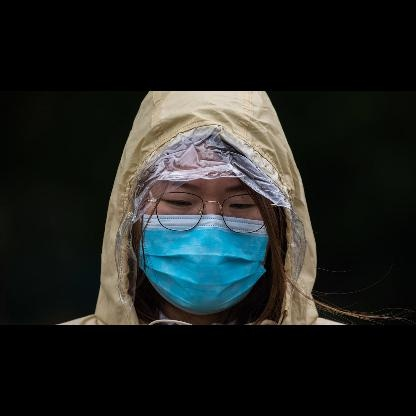

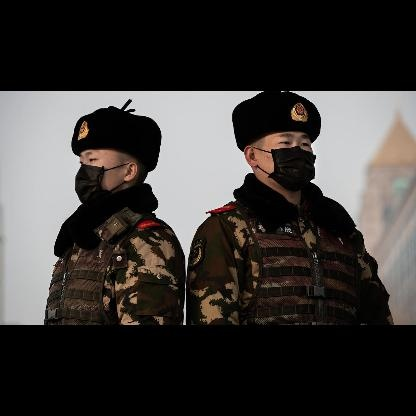

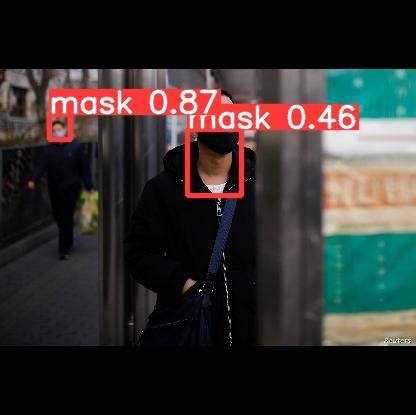

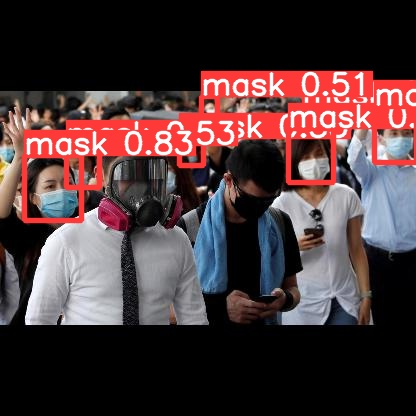

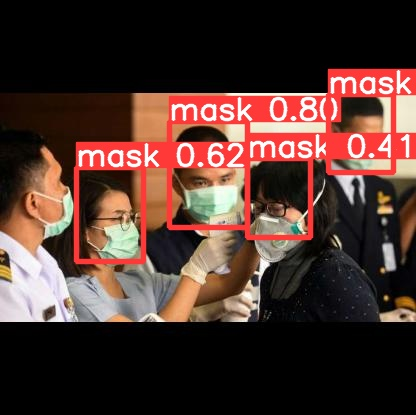

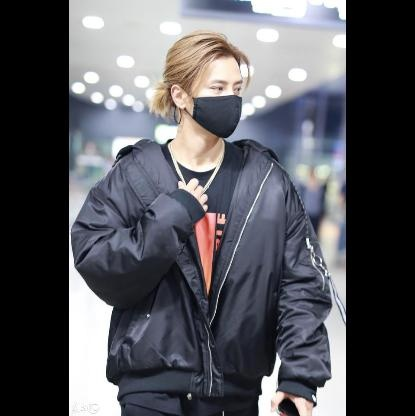

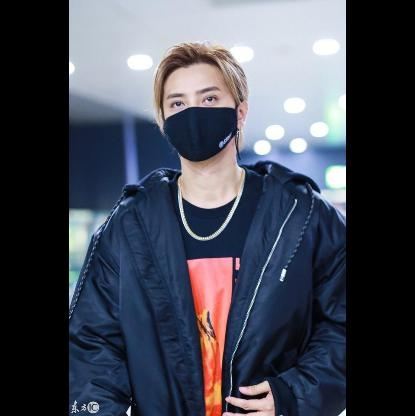

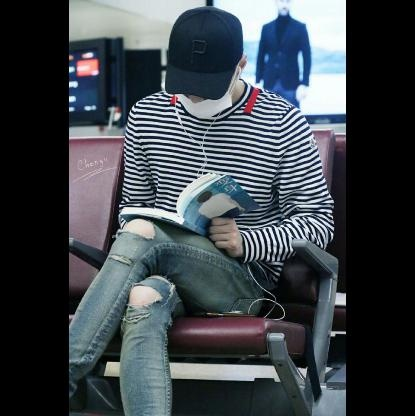

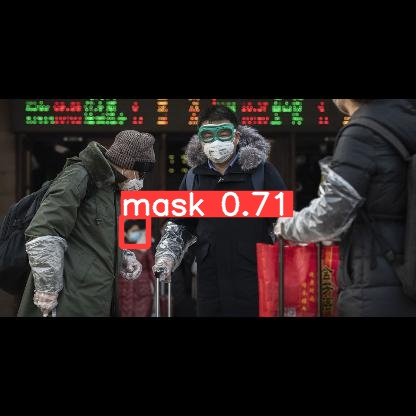

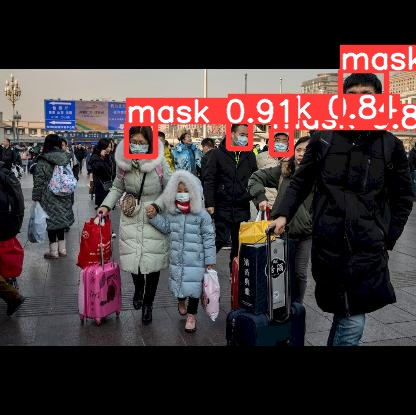

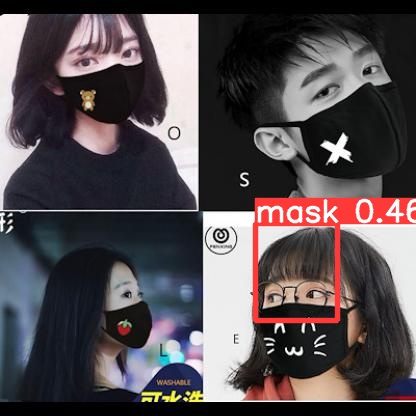

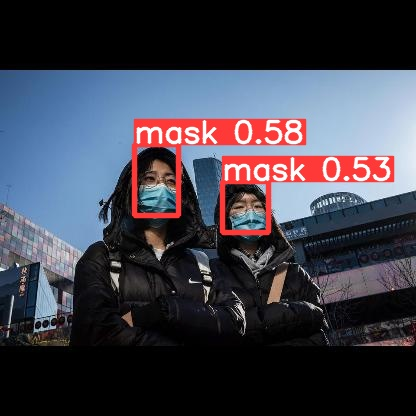

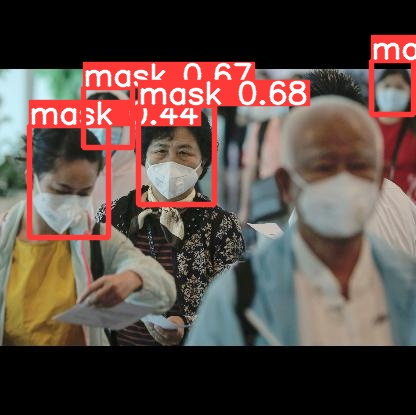

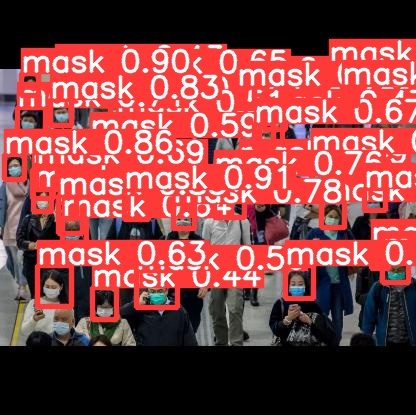

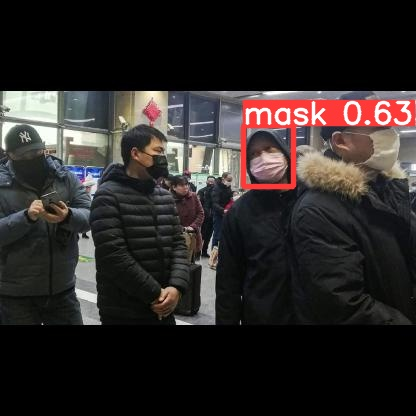

In [ ]:
import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp2/*.jpg'):
    display(Image(filename=imageName))
    print("\n")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%cp /content/yolov5/runs/train/pothole_results/weights/best.pt /content/drive/MyDrive/Colab\ Notebooks

In [ ]:
%rm -rf /content/yolov5-data